In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.duplicated().sum()

5268

In [9]:
# Checking Missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Checking the cancelled orders
cancelled = df[df['InvoiceNo'].str.startswith('C')]

In [11]:
cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [12]:
# Returned orders
returned = df[df['Quantity'] < 0]

In [13]:
returned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [14]:
# Removing cancel orders
df = df[~df['InvoiceNo'].str.startswith('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
# Remoing the missing customer id smaples
df.dropna(subset=['CustomerID'], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2224\547828356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CustomerID'], inplace=True)


In [16]:
# Returned orders
returned = df[df['Quantity'] < 0]

In [17]:
returned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df.duplicated().sum()

5192

In [20]:
# Removing duplicate values
df.drop_duplicates(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2224\3109805958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(392732, 8)

# RFM
# Recency, Frequency, Monetary

In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2224\3633860036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [24]:
# Finding tha latest transaction takes place and then we add 1 day to the date fro calculating the recency
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


# Recency

In [25]:
# Find the last purchase date per customer
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()

# Calculate Recency by subtracting last purchase date from reference date
recency = (reference_date - last_purchase).dt.days

# Create a new DataFrame with CustomerID and Recency
rfm = recency.reset_index().rename(columns={'InvoiceDate': 'Recency'})


# Frequency

In [26]:
# Count number of invoices per customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Merge frequency with the existing rfm dataframe
rfm = rfm.merge(frequency, on='CustomerID')


# Monetary

In [27]:
# Calculate total spent per customer (Quantity * UnitPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Sum total spent per customer
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

# Merge monetary with rfm dataframe
rfm = rfm.merge(monetary, on='CustomerID')


C:\Users\DELL\AppData\Local\Temp\ipykernel_2224\2441061440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [28]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,278,1,180.60
4335,18281.0,181,1,80.82
4336,18282.0,8,2,178.05
4337,18283.0,4,16,2045.53


In [29]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [30]:
rfm.shape

(4339, 4)

# Apply Standard Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = rfm.copy()
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [32]:
rfm_scaled

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2.334858,-0.424675,8.363977
1,12347.0,-0.905199,0.354080,0.251779
2,12348.0,-0.175186,-0.035297,-0.027938
3,12349.0,-0.735196,-0.424675,-0.032357
4,12350.0,2.174855,-0.424675,-0.190780
...,...,...,...,...
4334,18280.0,1.854850,-0.424675,-0.207901
4335,18281.0,0.884833,-0.424675,-0.219008
4336,18282.0,-0.845198,-0.294882,-0.208185
4337,18283.0,-0.885199,1.522213,-0.000299


In [33]:
# features for clustering
X = rfm_scaled[['Recency','Frequency','Monetary']].values

In [34]:
X

array([[ 2.33485829e+00, -4.24674873e-01,  8.36397668e+00],
       [-9.05199314e-01,  3.54080191e-01,  2.51778965e-01],
       [-1.75186336e-01, -3.52973410e-02, -2.79383250e-02],
       ...,
       [-8.45198247e-01, -2.94882363e-01, -2.08184524e-01],
       [-8.85198958e-01,  1.52221279e+00, -2.98993684e-04],
       [-4.95192025e-01, -1.65089852e-01, -2.34811224e-02]])

# Choosing value of k

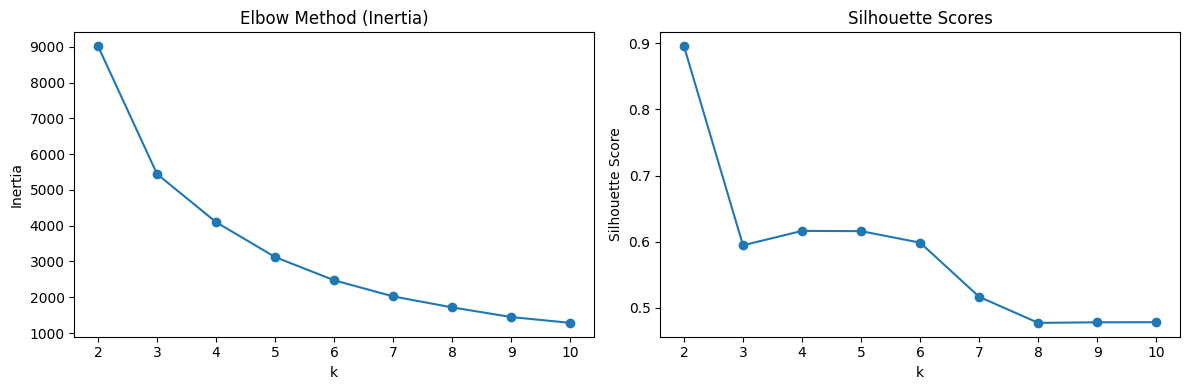

In [35]:
# Elbow & Silhouette to choose k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Ks = range(2, 11)   # testing k from 2..10
inertias = []
sil_scores = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    try:
        sil_scores.append(silhouette_score(X, labels))
    except Exception as e:
        sil_scores.append(np.nan)

# Plot Elbow (inertia) and Silhouette
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(Ks), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')

plt.subplot(1,2,2)
plt.plot(list(Ks), sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()


In [36]:
# Print silhouette values for reference
print('k : silhouette')
for k, s in zip(Ks, sil_scores):
    print(f'{k} : {s:.4f}')

k : silhouette
2 : 0.8959
3 : 0.5944
4 : 0.6161
5 : 0.6158
6 : 0.5983
7 : 0.5162
8 : 0.4768
9 : 0.4777
10 : 0.4779


# Model -> K-Means

In [54]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Attach cluster labels to both scaled and original RFM dataframes
rfm_scaled['Cluster'] = labels
rfm['Cluster'] = labels

In [55]:
rfm_scaled

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,2.334858,-0.424675,8.363977,0
1,12347.0,-0.905199,0.354080,0.251779,3
2,12348.0,-0.175186,-0.035297,-0.027938,3
3,12349.0,-0.735196,-0.424675,-0.032357,3
4,12350.0,2.174855,-0.424675,-0.190780,1
...,...,...,...,...,...
4334,18280.0,1.854850,-0.424675,-0.207901,1
4335,18281.0,0.884833,-0.424675,-0.219008,1
4336,18282.0,-0.845198,-0.294882,-0.208185,3
4337,18283.0,-0.885199,1.522213,-0.000299,0


In [56]:
# Group by cluster and calculate mean Recency, Frequency, Monetary
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count'   # number of customers in each cluster
}).rename(columns={'Cluster': 'Count'})

print(cluster_profile)


            Recency  Frequency       Monetary  Count
Cluster                                             
0         15.672986  22.047393   12435.086682    211
1        248.564030   1.551789     476.330547   1062
2          7.384615  82.692308  127187.959231     13
3         43.910580   3.655748    1344.284013   3053


# Visualization of clusters

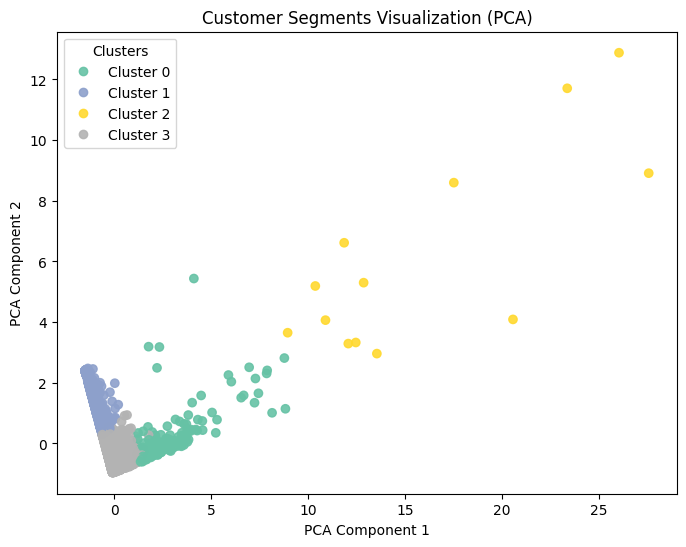

In [61]:
from sklearn.decomposition import PCA

# Take the scaled features and cluster labels
X = rfm_scaled[['Recency', 'Frequency', 'Monetary']].values
labels = rfm_scaled['Cluster'].values

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2', alpha=0.9)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualization (PCA)')

# Create legend for clusters
handles, _ = scatter.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in range(len(set(labels)))], title="Clusters")

plt.show()


# Maping cluster numbers to descriptive labels

- **0: Loyal Customers**  
- **1: At-Risk Customers**  
- **2: Champions**  
- **3: Occasional Buyers**


In [ ]:
# Create a dictionary for mapping
cluster_names = {
    0: "Loyal Customers",
    1: "At-Risk Customers",
    2: "Champions",
    3: "Occasional Buyers"
}

# Add a new column 'Segment' with labels
rfm_scaled['Segment'] = rfm_scaled['Cluster'].map(cluster_names)
rfm['Segment'] = rfm['Cluster'].map(cluster_names)



In [63]:
rfm_scaled

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,2.334858,-0.424675,8.363977,0,Loyal Customers
1,12347.0,-0.905199,0.354080,0.251779,3,Occasional Buyers
2,12348.0,-0.175186,-0.035297,-0.027938,3,Occasional Buyers
3,12349.0,-0.735196,-0.424675,-0.032357,3,Occasional Buyers
4,12350.0,2.174855,-0.424675,-0.190780,1,At-Risk Customers
...,...,...,...,...,...,...
4334,18280.0,1.854850,-0.424675,-0.207901,1,At-Risk Customers
4335,18281.0,0.884833,-0.424675,-0.219008,1,At-Risk Customers
4336,18282.0,-0.845198,-0.294882,-0.208185,3,Occasional Buyers
4337,18283.0,-0.885199,1.522213,-0.000299,0,Loyal Customers


# Visulaization

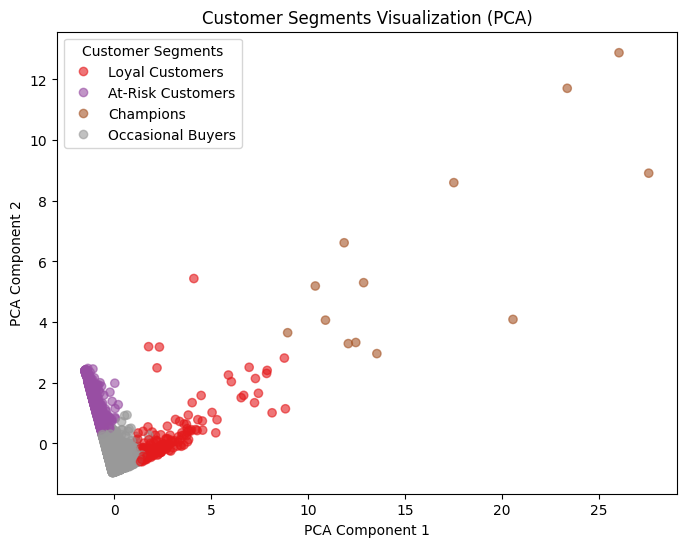

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = rfm_scaled[['Recency', 'Frequency', 'Monetary']].values
labels = rfm_scaled['Segment'].values  # use the descriptive labels now

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))

# To color by segment, we need numeric codes for segments
unique_segments = list(cluster_names.values())
color_map = {name: idx for idx, name in enumerate(unique_segments)}
colors = [color_map[label] for label in labels]

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='Set1', alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualization (PCA)')

# Create legend with segment names
handles, _ = scatter.legend_elements()
plt.legend(handles, unique_segments, title="Customer Segments")

plt.show()


# Exporting the segmented data in csv

In [66]:
rfm.to_csv('customer_segments.csv', index=False)

# Saving the model

In [67]:
from joblib import dump

# Assuming you trained kmeans on scaled data:
dump(kmeans, 'kmeans_model.joblib')
dump(scaler, 'scaler.joblib')


['scaler.joblib']